# Installing the the required packages

In [1]:
%pip install numpy
%pip install scikit-image
%pip install matplotlib
%pip install scipy


Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


# Imports

In [47]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from skimage import filters
from skimage.morphology import binary_erosion, binary_dilation, binary_opening, binary_closing, disk, remove_small_objects
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage import color, exposure
from skimage import img_as_ubyte
from skimage.feature import hog
from skimage.measure import label, regionprops

# Preprocessing

Text(0.5, 1.0, 'Contrast stretched image')

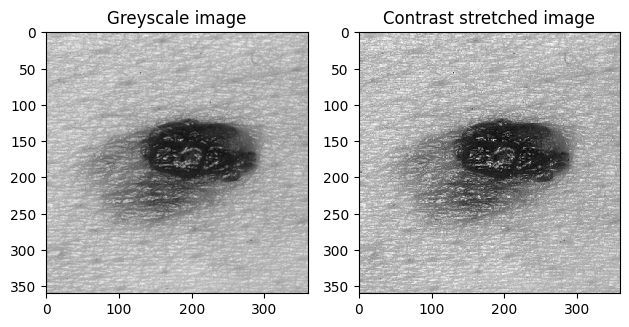

In [74]:
raw_image = io.imread("Skin tumor.jfif")
bw_image = color.rgb2gray(raw_image)
contrast_stretched_image = exposure.rescale_intensity(bw_image)
plt.subplot(1, 2, 1)
plt.imshow(bw_image, cmap='gray')
plt.title("Greyscale image")
plt.subplot(122)
io.imshow(contrast_stretched_image)
plt.title("Contrast stretched image")

# Segmentation

0.564453125


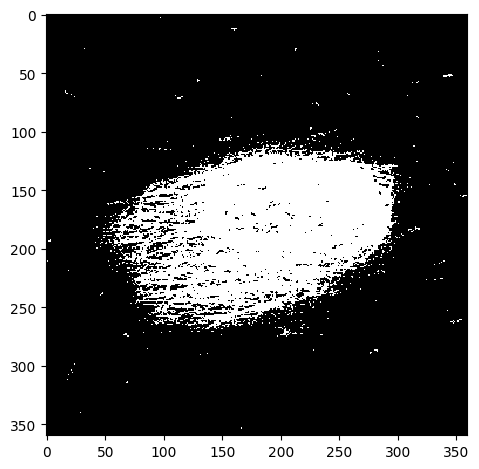

In [75]:
outer_thresh = filters.threshold_yen(contrast_stretched_image)
print(outer_thresh)
outer_tumor_image = contrast_stretched_image < outer_thresh
io.imshow(outer_tumor_image)

# Morphology

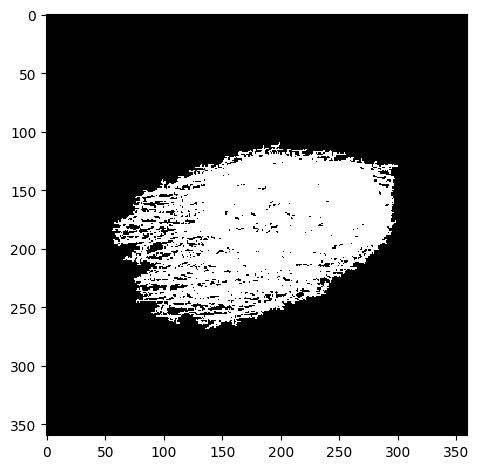

In [76]:
outer_tumor_image = remove_small_objects(outer_tumor_image, min_size=100)
io.imshow(outer_tumor_image)

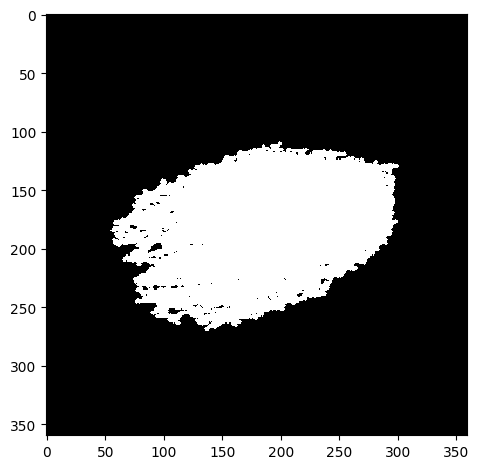

In [77]:
dilated_outer_image = binary_dilation(outer_tumor_image)
io.imshow(dilated_outer_image)

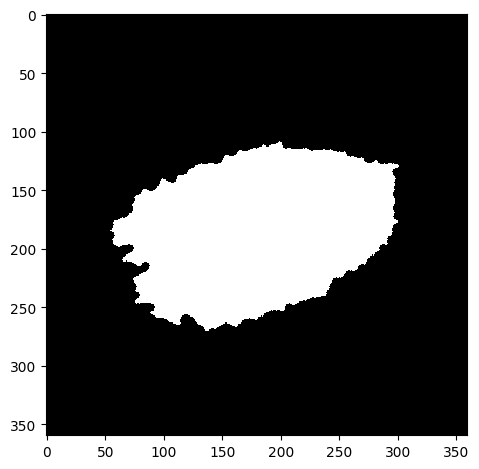

In [78]:
struct_element = disk(3)
final_outer_image = binary_closing(dilated_outer_image, footprint=struct_element)
io.imshow(final_outer_image)

# Feature extraction

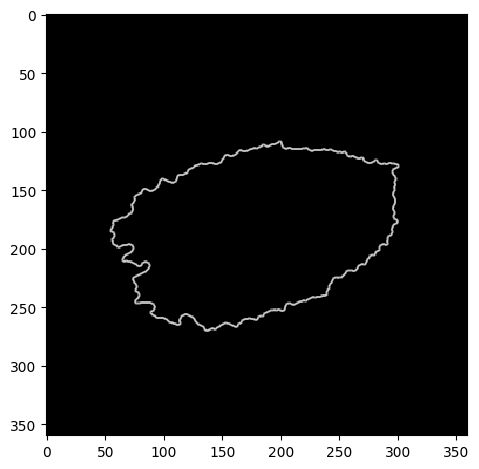

In [35]:
sobel_filtered_image = filters.sobel(final_outer_image)
io.imshow(sobel_filtered_image)

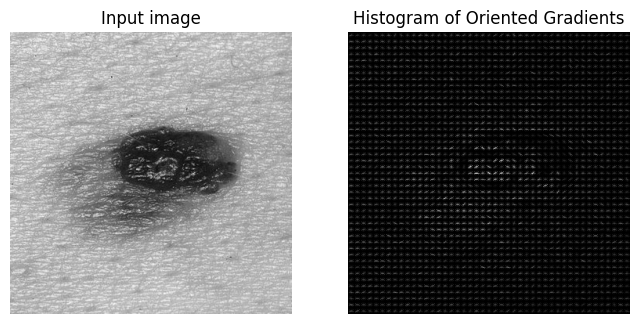

In [45]:
fd, hog_image = hog(
    bw_image,
    visualize=True,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(bw_image, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

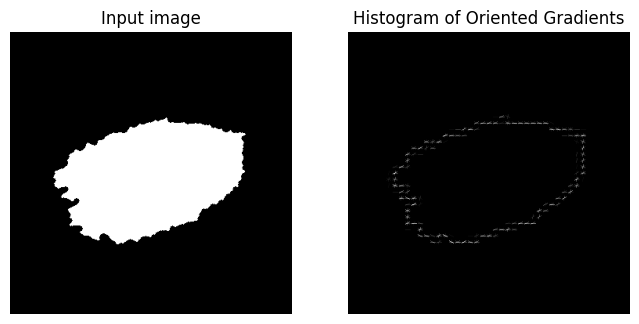

In [46]:
fd, hog_image = hog(
    final_outer_image,
    visualize=True,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(final_outer_image, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [50]:
labeled_image = label(final_outer_image)
region_props = regionprops(labeled_image)

In [53]:
area = region_props[0].area
perimeter = region_props[0].perimeter
print(f"Area: {area}\nperimeter: {perimeter}")

Area: 26864.0
perimeter: 863.0163773909259


[]

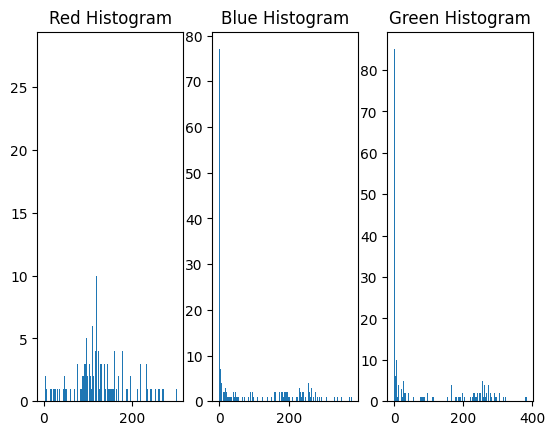

In [57]:
red_hist = [0] * 256
green_hist = [0] * 256
blue_hist = [0] * 256
for i in range(raw_image.shape[0]):
    for j in range(raw_image.shape[1]):
        if (final_outer_image[i][j]):
            red_hist[raw_image[i][j][0]] += 1
            blue_hist[raw_image[i][j][1]] += 1
            green_hist[raw_image[i][j][2]] += 1
plt.subplot(1,3,1)
plt.title("Red Histogram")
plt.hist(red_hist, bins=256)
plt.subplot(1,3,2)
plt.title("Blue Histogram")
plt.hist(blue_hist, bins=256)
plt.subplot(1,3,3)
plt.title("Green Histogram")
plt.hist(green_hist, bins=256)
plt.plot()

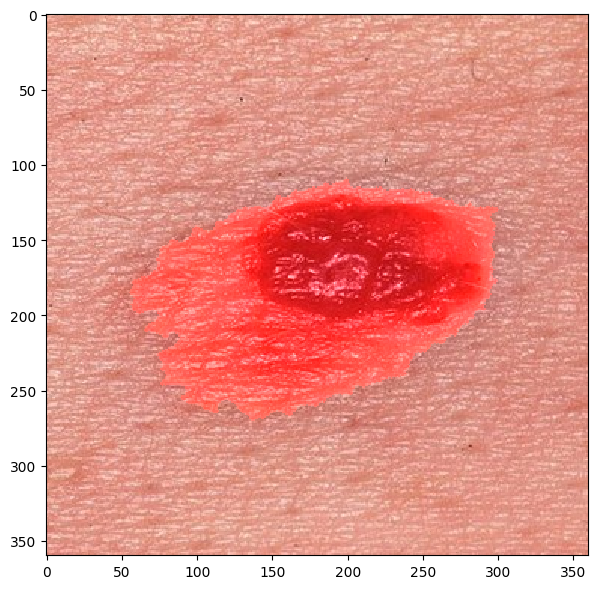

In [73]:
highlighted_image = np.copy(raw_image)
for i in range(raw_image.shape[0]):
    for j in range(raw_image.shape[1]):
        if (final_outer_image[i][j]):
            highlighted_image[i][j][0] = min(highlighted_image[i][j][0] + 150, 255)
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
io.imshow(highlighted_image)